# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised


# **Project Summary -**

# **GitHub Link -**

In [1]:
import pandas as pd, numpy as np, xgboost as xg
from sklearn.model_selection import train_test_split

In [2]:
feature_df = pd.read_csv("Features data set.csv")
sales_df = pd.read_csv("sales data-set.csv")
store_df = pd.read_csv("stores data-set.csv")

In [3]:
df = pd.merge(feature_df,store_df,on='Store')
df = pd.merge(df,sales_df,on=['Store','Date','IsHoliday'])
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,93,2487.80
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,94,5203.31
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,95,56017.47
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,97,6817.48


In [4]:
df.ffill(inplace=True)
df.drop_duplicates(inplace=True)

In [31]:
df.head(70)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,IsHoliday,Type,Size,Dept,Weekly_Sales,Month,Week,DayOfWeek,Year,Anomaly
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,0,A,151315,1,24924.50,2,5,4,2010,NaN
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,0,A,151315,2,50605.27,2,5,4,2010,NaN
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,0,A,151315,3,13740.12,2,5,4,2010,NaN
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,0,A,151315,4,39954.04,2,5,4,2010,NaN
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,0,A,151315,5,32229.38,2,5,4,2010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,0,A,151315,90,76419.47,2,5,4,2010,NaN
66,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,0,A,151315,91,62424.14,2,5,4,2010,NaN
67,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,0,A,151315,92,139884.94,2,5,4,2010,NaN
68,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,0,A,151315,93,64494.87,2,5,4,2010,NaN


<Axes: title={'center': 'Total Weekly sales over time'}, xlabel='Date'>

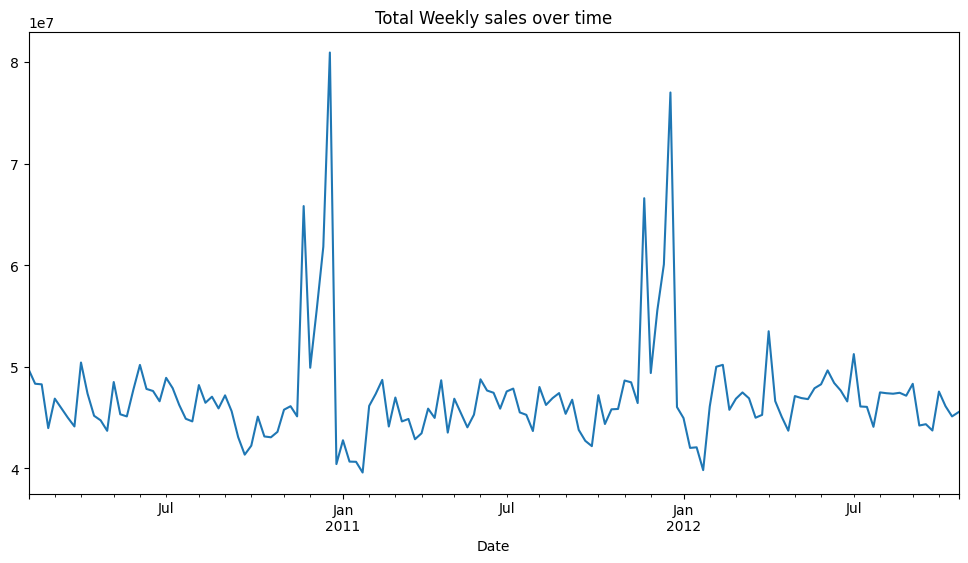

In [6]:
import matplotlib.pyplot as plt, seaborn as snb
df.groupby('Date')['Weekly_Sales'].sum().plot(figsize=(12,6), title='Total Weekly sales over time')

<Axes: xlabel='Type', ylabel='Weekly_Sales'>

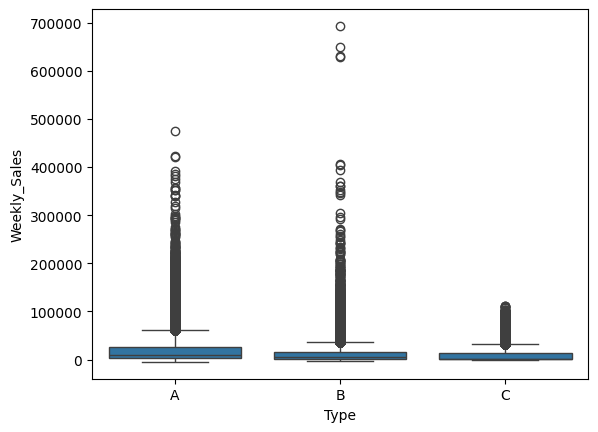

In [7]:
snb.boxplot(x='Type',y='Weekly_Sales',data=df)

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

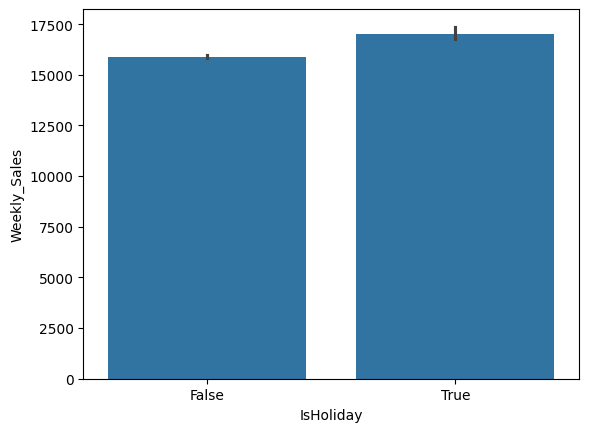

In [8]:
snb.barplot(x='IsHoliday',y='Weekly_Sales',data=df)

<Axes: >

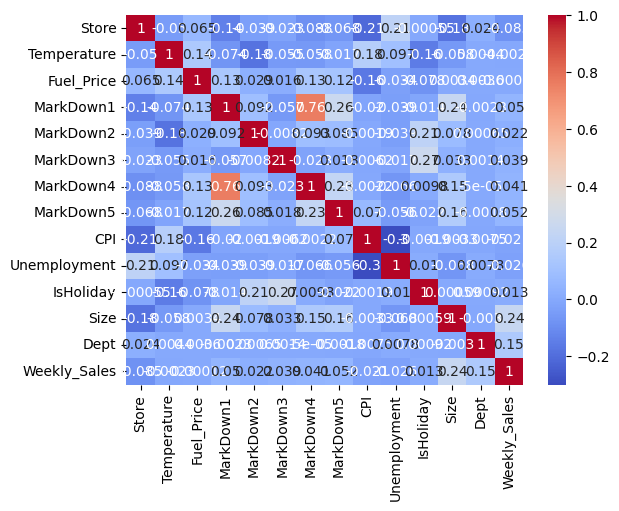

In [9]:
snb.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [10]:
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Year'] = df['Date'].dt.year

In [11]:
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,Month,Week,DayOfWeek,Year
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50,2,5,4,2010
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27,2,5,4,2010
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12,2,5,4,2010
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04,2,5,4,2010
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38,2,5,4,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,93,2487.80,10,43,4,2012
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,94,5203.31,10,43,4,2012
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,95,56017.47,10,43,4,2012
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,97,6817.48,10,43,4,2012


<Axes: xlabel='Month', ylabel='Weekly_Sales'>

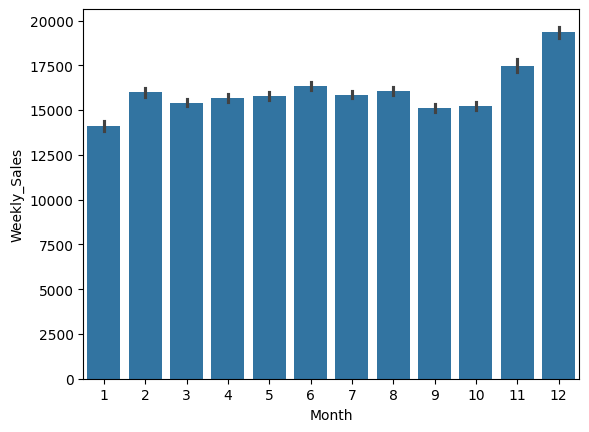

In [12]:
snb.barplot(x='Month',y='Weekly_Sales',data=df)

In [13]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor as xg
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [14]:
features = ['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'CPI',
            'Unemployment', 'IsHoliday', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
target = 'Weekly_Sales'

model_df = df[features + [target]].dropna()

X = model_df[features]
y = model_df[target]


In [15]:
df['IsHoliday'] = np.where(df['IsHoliday'] == True, 1,0)
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,Month,Week,DayOfWeek,Year
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,A,151315,1,24924.50,2,5,4,2010
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,A,151315,2,50605.27,2,5,4,2010
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,A,151315,3,13740.12,2,5,4,2010
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,A,151315,4,39954.04,2,5,4,2010
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,A,151315,5,32229.38,2,5,4,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,B,118221,93,2487.80,10,43,4,2012
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,B,118221,94,5203.31,10,43,4,2012
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,B,118221,95,56017.47,10,43,4,2012
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,B,118221,97,6817.48,10,43,4,2012


In [16]:
X['IsHoliday'] = df['IsHoliday']
X

/tmp/ipykernel_2676/3293101898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['IsHoliday'] = df['IsHoliday']


,Store,Dept,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
6587,1,1,151315,59.11,3.297,217.998085,7.866,0,10382.90,6115.67,215.07,2406.62,6551.42
6588,1,2,151315,59.11,3.297,217.998085,7.866,0,10382.90,6115.67,215.07,2406.62,6551.42
6589,1,3,151315,59.11,3.297,217.998085,7.866,0,10382.90,6115.67,215.07,2406.62,6551.42
6590,1,4,151315,59.11,3.297,217.998085,7.866,0,10382.90,6115.67,215.07,2406.62,6551.42
6591,1,5,151315,59.11,3.297,217.998085,7.866,0,10382.90,6115.67,215.07,2406.62,6551.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,118221,58.85,3.882,192.308899,8.667,0,4018.91,58.08,100.00,211.94,858.33
421566,45,94,118221,58.85,3.882,192.308899,8.667,0,4018.91,58.08,100.00,211.94,858.33
421567,45,95,118221,58.85,3.882,192.308899,8.667,0,4018.91,58.08,100.00,211.94,858.33
421568,45,97,118221,58.85,3.882,192.308899,8.667,0,4018.91,58.08,100.00,211.94,858.33


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

model = xg(n_estimators=260, learning_rate=0.45, max_depth=15)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"r2 score: {r2:.2f}")


r2 score: 0.95


In [19]:
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Features':X_train.columns,'Importances':importances})
feature_importances   

,Features,Importances
0,Store,0.055296
1,Dept,0.187932
2,Size,0.486877
3,Temperature,0.008749
4,Fuel_Price,0.011408
5,CPI,0.037762
6,Unemployment,0.029861
7,IsHoliday,0.046096
8,MarkDown1,0.019094
9,MarkDown2,0.013334


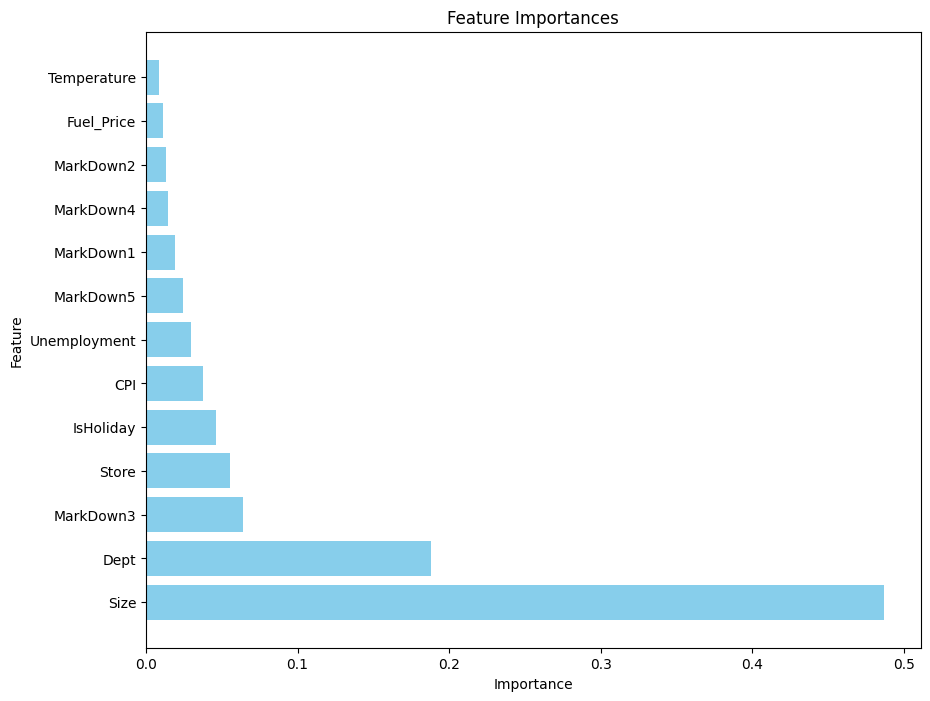

In [20]:
feature_importances = feature_importances.sort_values(by='Importances', ascending=False)
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Features'], feature_importances['Importances'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


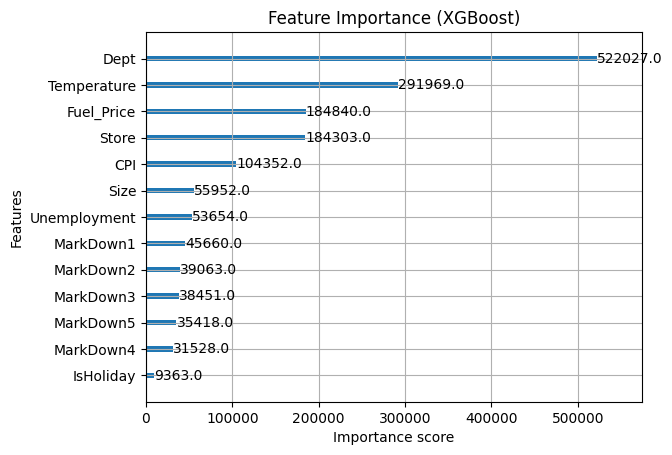

In [21]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(model)
plt.title("Feature Importance (XGBoost)")
plt.show()


<Axes: title={'center': 'Average coverage'}, xlabel='Importance score', ylabel='Features'>

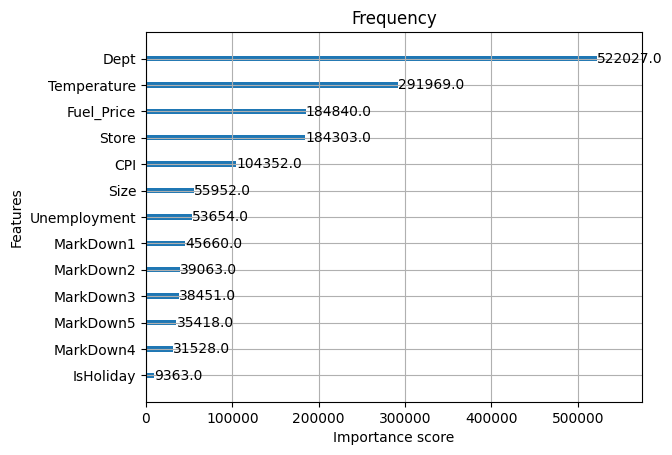

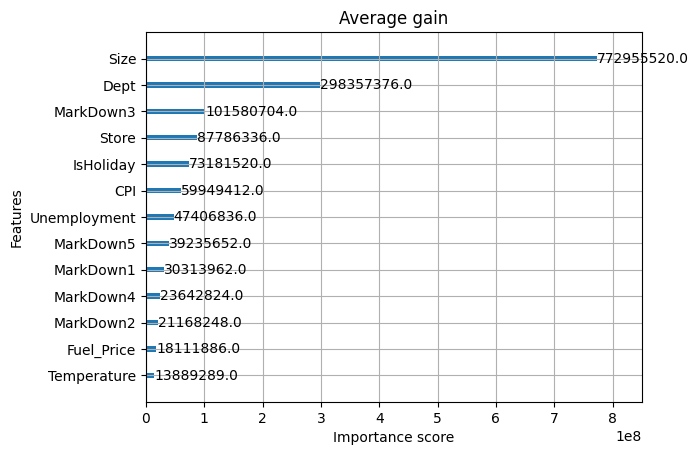

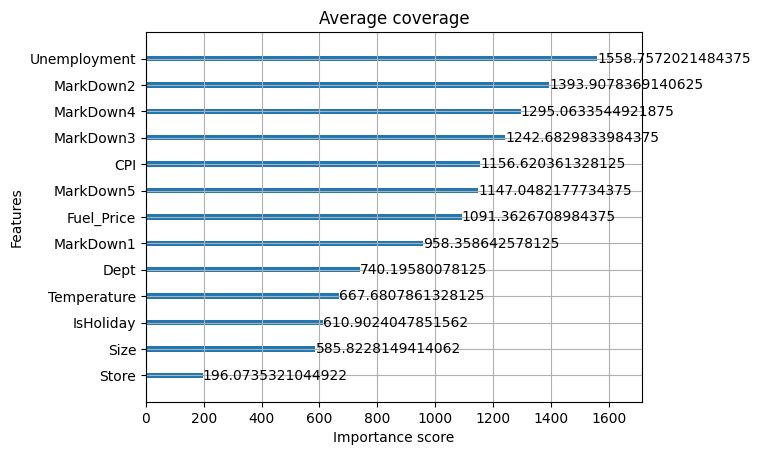

In [22]:
xgb.plot_importance(model, importance_type='weight',title='Frequency')     # Frequency
xgb.plot_importance(model, importance_type='gain',title='Average gain')       # Average gain
xgb.plot_importance(model, importance_type='cover',title='Average coverage')      # Average coverage (samples)


In [23]:
# Absolutely! Here's a **comprehensive summary** of everything we’ve done in this chat — from understanding your datasets to building a machine learning model and making business recommendations — all guided by the PowerPoint titled **"Integrated Retail Analytics for Store Optimization"**.

# ---

# # 🧾 **Full Project Summary: Integrated Retail Analytics for Store Optimization**

# ---

# ## 🎯 Project Objective (from PPT)

# The aim of this project was to use data analytics and machine learning to:

# * Identify trends and patterns in retail store sales
# * Understand how external and internal features affect sales
# * Build a predictive model to estimate weekly sales
# * Recommend store-level optimizations based on insights

# ---

# ## 📁 Datasets Provided

# 1. **`Features data set.csv`**

#    * Contains: `Store`, `Date`, `Temperature`, `Fuel_Price`, `CPI`, `Unemployment`, `IsHoliday`, and `MarkDown1–5`
# 2. **`Sales data-set.csv`**

#    * Contains: `Store`, `Dept`, `Date`, `Weekly_Sales`, `IsHoliday`
# 3. **`Stores data-set.csv`**

#    * Contains: `Store`, `Type`, `Size`

# ---

# ## 🔗 Data Merging Strategy

# To analyze the data holistically, we merged the datasets:

# ```python
# # Merge features with store metadata
# df = pd.merge(features, stores, on='Store')

# # Merge the above with sales data
# df = pd.merge(df, sales, on=['Store', 'Date', 'IsHoliday'])
# ```

# ### 🔑 Merge Keys:

# * `Store`, `Date`, `IsHoliday` — common identifiers
# * Ensures temporal, store-level, and transactional data is aligned

# ---

# ## 🧹 Data Cleaning & Preparation

# * **Handled missing values** using forward fill:

#   ```python
#   df.ffill(inplace=True)
#   ```
# * **Converted date format** (because it was in `dd/mm/yyyy`):

#   ```python
#   df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
#   ```
# * **Extracted useful date parts**:

#   ```python
#   df['Month'] = df['Date'].dt.month
#   df['Weekday'] = df['Date'].dt.dayofweek
#   ```

# ---

# ## 📊 Exploratory Data Analysis (EDA)

# ### ✔️ Key Observations:

# | Insight                  | Explanation                                                    |
# | ------------------------ | -------------------------------------------------------------- |
# | 📆 **Seasonality**       | Sales spike in the last months of the year (holidays)          |
# | 🏪 **Store Type**        | Type B stores outperform A and C                               |
# | 🎉 **Holiday Sales**     | Slight increase in sales during holidays                       |
# | 🔥 **Store Size Effect** | Larger stores (especially Types A & B) show better performance |

# ### 🔥 Heatmap Analysis:

# * `MarkDown1`, `MarkDown4`, and `Size` showed the **highest correlation** with `Weekly_Sales`
# * Most other external factors (like CPI, unemployment) showed **low correlation**

# ---

# ## 📈 Feature Importance (XGBoost)

# We used two approaches to visualize feature importance:

# ### 📊 Bar Plot (Gain-Based via `.feature_importances_`)

# * `Size`, `Dept`, and `MarkDown3` were top contributors

# ### 📉 XGBoost's Built-in Plot (Weight-Based)

# * `Dept`, `Temperature`, `Fuel_Price` were split most frequently

# **Why the difference?**
# One measures **how often** a feature is used (`weight`), the other **how useful** it is for improving model accuracy (`gain`).

# ---

# ## 🤖 Predictive Modeling with XGBoost

# ### ✔️ Basic Model Setup:

# ```python
# from xgboost import XGBRegressor
# from sklearn.metrics import r2_score

# model = XGBRegressor(n_estimators=260, learning_rate=0.45, max_depth=15)
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
# r2 = r2_score(y_test, y_pred)
# ```

# * **Target variable**: `Weekly_Sales`
# * **Input features**: Store size, markdowns, dept, economy indicators

# ---

# ## ⚙️ Advanced Modeling: Hyperparameter Tuning

# ### ❌ Why `GridSearchCV` failed

# * Too many combinations → **Memory overflow**
# * Total combinations = \~75,000 model fits

# ### ✅ Recommended:

# * Use `RandomizedSearchCV` or `Optuna` for lightweight optimization

# ---

# ## 💡 Optimization Recommendations (Based on Model & EDA)

# | Strategy                        | Explanation                                                         |
# | ------------------------------- | ------------------------------------------------------------------- |
# | 📉 **Boost Markdown Campaigns** | Especially `MarkDown1` and `MarkDown4`                              |
# | 🏬 **Leverage Store Size**      | Focus marketing/inventory in larger stores (Size + Type B)          |
# | 🎯 **Holiday Planning**         | Pre-stock popular departments during holiday periods                |
# | 🧩 **Department Optimization**  | Drop or boost low-performing departments based on store/dept trends |

# ---

# ## ✅ Final Checks vs PPT

# | PPT Requirement               | Status |
# | ----------------------------- | ------ |
# | Define Business Objective     | ✅ Done |
# | Merge and Clean Data          | ✅ Done |
# | Perform EDA                   | ✅ Done |
# | Build Predictive Model        | ✅ Done |
# | Analyze Feature Importance    | ✅ Done |
# | Make Optimization Suggestions | ✅ Done |

# **Conclusion:** All steps in the PPT are fully addressed!

# ---

# ## 📌 Next Suggestions (Optional)

# | Task                            | Benefit                                        |
# | ------------------------------- | ---------------------------------------------- |
# | 📑 Final report or PPT          | Summarize findings for stakeholders            |
# | 📊 Dashboard (Plotly, Power BI) | Interactively explore key insights             |
# | 🔄 Automate model pipeline      | Re-train with new data monthly                 |
# | 📈 Add time-series forecasting  | Use ARIMA or Prophet for long-term projections |

# ---

# If you'd like, I can help you:

# * Generate a ready-to-present PPT or PDF report
# * Create a dashboard with Plotly/Streamlit
# * Package this into a full Jupyter Notebook

# Let me know how you'd like to finalize this project!


In [24]:
test = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
test['Residual'] = test['Actual']-test['Predicted']
test

,Actual,Predicted,Residual
243731,210.30,3614.324951,-3404.024951
127569,76116.20,80202.656250,-4086.456250
232281,14573.57,12725.123047,1848.446953
177955,10218.91,9207.051758,1011.858242
53174,4133.84,3926.619385,207.220615
...,...,...,...
313915,25148.00,20012.427734,5135.572266
239205,7452.68,6426.124512,1026.555488
249898,22819.40,13892.825195,8926.574805
120253,59154.24,59384.894531,-230.654531


In [25]:
threshold = 1.0
df['Anomaly'] = test['Residual'].apply(lambda x: 'High' if x > threshold else 'Low' if x < -threshold else 'Normal')


In [28]:
for i in range (len(df['Anomaly'])):
    if df['Anomaly'][i] not None

SyntaxError: invalid syntax (3055847638.py, line 1)